<a href="https://colab.research.google.com/github/ElGrandePadre/Spring2024STARepo/blob/main/MattC_Math_24_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Random Number Generator

In [2]:
#CDF PDF

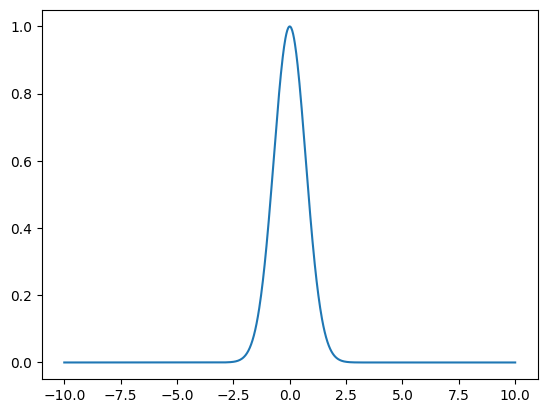

In [102]:
x = np.linspace(-10,10,1000) #Creates 1000 evenly spaced numbers from -10 to 10
y = 2.71**(-x**2)
plt.plot(x,y)



$e^{-x^2}$

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [4]:
def normal_pdf(x,mu,sigma):

  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))

In [5]:
x = np.linspace(-6,6,1000)

In [6]:
x

array([-6.        , -5.98798799, -5.97597598, -5.96396396, -5.95195195,
       -5.93993994, -5.92792793, -5.91591592, -5.9039039 , -5.89189189,
       -5.87987988, -5.86786787, -5.85585586, -5.84384384, -5.83183183,
       -5.81981982, -5.80780781, -5.7957958 , -5.78378378, -5.77177177,
       -5.75975976, -5.74774775, -5.73573574, -5.72372372, -5.71171171,
       -5.6996997 , -5.68768769, -5.67567568, -5.66366366, -5.65165165,
       -5.63963964, -5.62762763, -5.61561562, -5.6036036 , -5.59159159,
       -5.57957958, -5.56756757, -5.55555556, -5.54354354, -5.53153153,
       -5.51951952, -5.50750751, -5.4954955 , -5.48348348, -5.47147147,
       -5.45945946, -5.44744745, -5.43543544, -5.42342342, -5.41141141,
       -5.3993994 , -5.38738739, -5.37537538, -5.36336336, -5.35135135,
       -5.33933934, -5.32732733, -5.31531532, -5.3033033 , -5.29129129,
       -5.27927928, -5.26726727, -5.25525526, -5.24324324, -5.23123123,
       -5.21921922, -5.20720721, -5.1951952 , -5.18318318, -5.17

In [7]:
mu = 0

In [8]:
sigma = 1

In [9]:
pdf = normal_pdf(x,mu,sigma)

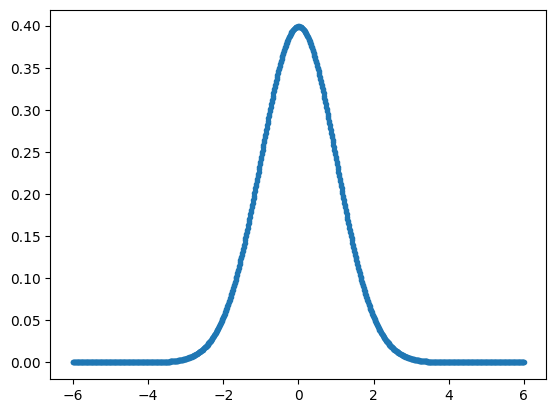

In [10]:
plt.plot(x,pdf,'.')
# plt.plot(x,y,'g.')

In [151]:
n= 5
x[0:n]
np.sum(x[0:n])

-49.7997997997998

In [159]:
def cumulative_sum(x):

  y = np.zeros(x.shape)

  for n in range(x.shape[0]):

    y[n] = np.sum(x[0:n])

#   y = y / np.max(y)

  return y

In [126]:
#Fill array with sequenced numbers

z = np.array([1,2,3,4,5])

In [127]:
z

array([1, 2, 3, 4, 5])

In [128]:
cumulative_sum(z)

array([ 0.,  1.,  3.,  6., 10.])

In [153]:
cdf = cumulative_sum(pdf)

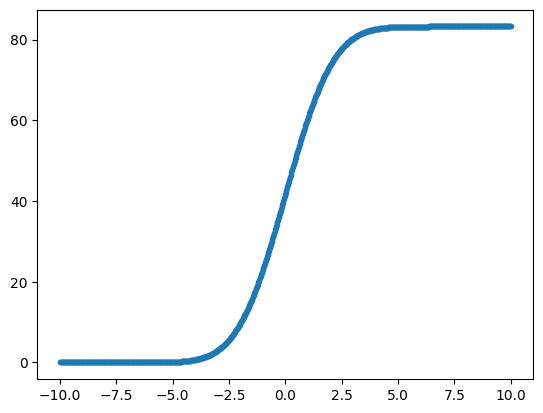

In [154]:
plt.plot(x,cdf,'.');

In [131]:
# d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the derivative of the cdf gives you back the pdf
# plt.plot(x[1:],d_cdf,'.');  #Not required for sampling

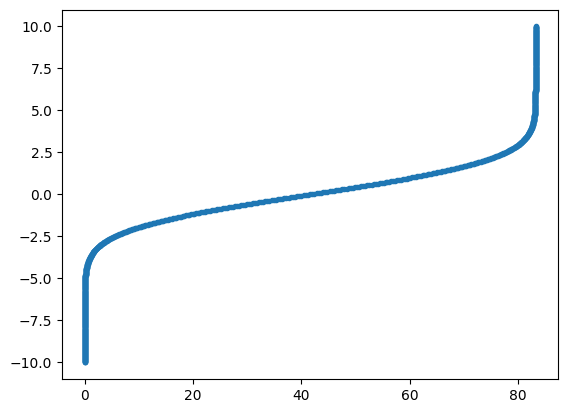

In [132]:
plt.plot(cdf,x,'.');

In [133]:
def find_nearest(array, value):

  idx = np.argmin(np.abs(array - value))

  return idx

In [134]:
z = np.array([11.2,32,63,4.3,5.67])

In [135]:
find_nearest(z, 22.1)

1

In [136]:
z[1]

32.0

In [137]:
find_nearest(cdf, 0.1)

247

In [138]:
x[393]

-2.1321321321321323

In [139]:
xr = np.random.random((100000,))

In [148]:
r = np.random.random()

In [149]:
r

0.7793631600348588

In [155]:
x[find_nearest(cdf, r)]

-3.9339339339339343

In [157]:
w = np.zeros(xr.shape[0])

for i in range(xr.shape[0]):

  w[i] = x[find_nearest(cdf, xr[i])]

In [144]:
w.shape

(100000,)

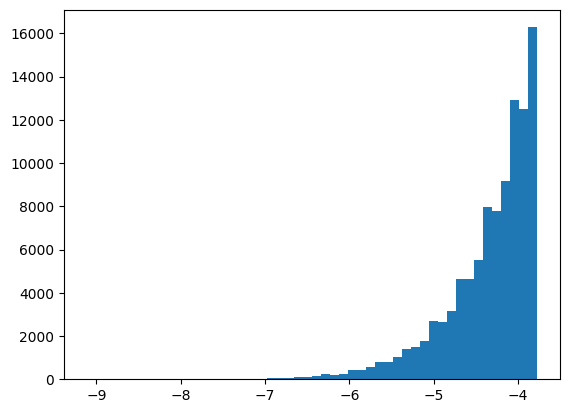

In [158]:
plt.hist(w,50);

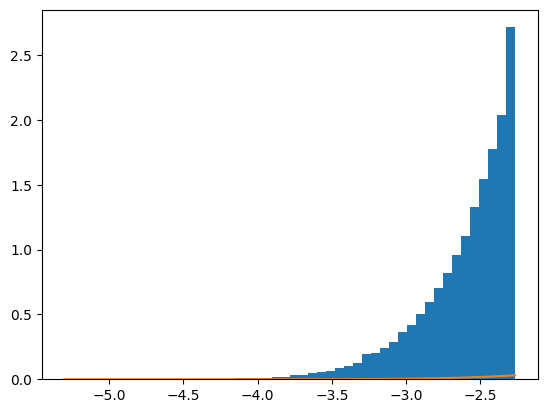

In [87]:
#Is supposed to plot a histogram following a normal curve

num_bins = 50
n,bins,patches = plt.hist(w, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins,y)

# Homework

# Birthday Paradox

In [34]:
#This simulation shows the probility of a specified number of people in a room sharing a birthday. However, birthdays are weighted to certain months due to holidays and events, this may tip the scales on probability.

import random

def simulate_birthday_paradox(people, simulations):
    matches = 0

    for i in range(simulations):
        birthdays = [random.randint(1, 365) for _ in range(people)]
        if len(birthdays) != len(set(birthdays)):
            matches += 1

    probability = matches / simulations
    return probability

# Number of people in the room
people = 2

# Number of simulations
simulations = 100000

# Calculate the probability
probability = simulate_birthday_paradox(people, simulations)
probability


0.00309

In [35]:
#ChatGPT used to incorporate birth rates. Values have not been adjusted to match real world examples

import random

# Birth rates by day of the year (approximated)
# This data can be replaced with real-world birth rate statistics
birth_rates = [0.0274] * 31 + [0.0250] * 28 + [0.0274] * 31 + [0.0260] * 30 + [0.0256] * 31 + [0.0260] * 30 + [0.0257] * 31 + [0.0255] * 31 + [0.0254] * 30 + [0.0252] * 31 + [0.0249] * 30 + [0.0233] * 31

def simulate_birthday_paradox(people, simulations):
    matches = 0

    for _ in range(simulations):
        # Sample birthdays based on birth rate distribution
        birthdays = random.choices(range(1, 366), weights=birth_rates, k=people)
        if len(birthdays) != len(set(birthdays)):
            matches += 1

    probability = matches / simulations
    return probability

# Number of people in the room
people = 2

# Number of simulations
simulations = 100000

# Calculate the probability
probability = simulate_birthday_paradox(people, simulations)
probability



0.0028

# Monty Hall

In [36]:
#Popular problem from the gameshow "Let's make a deal." Challenges contestants by opening one of three doors. Once they have made their choice, they are given the option of staying on that door or switching. This simulation proves that switching doors gives a better chance at winning the special prize.

def simulate_monty_hall_final(simulations):
    wins_switching = 0
    wins_staying = 0

    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
final_probability_staying, final_probability_switching


(0.33159, 0.66841)

# Simple Craps

In [37]:
#SImulates a dice game and the probability of winning said game. The player wins on 7 or 11, but loses on 2,3 or 12. Any other numbers would result in a reroll. In the reroll phase, they have to match their previously rolled number to win.

def simulate_dice_game(simulations):
    wins = 0

    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss
        if roll in [7, 11]:
            wins += 1
            continue
        elif roll in [2, 3, 12]:
            continue

        # Save the initial roll
        initial_roll = roll

        # Re-roll phase
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            if roll == 7:  # Loss condition
                break
            elif roll == initial_roll:  # Win condition
                wins += 1
                break

    probability_of_winning = wins / simulations
    return probability_of_winning

# Number of simulations
simulations = 10000

# Calculate the probability
probability_of_winning = simulate_dice_game(simulations)
probability_of_winning


0.4973

# Collector's Card Paradox


In [38]:
#Simulates and calculates the amount of card packs needed in order to collect a certain amount of specific cards.

def simulate_card_collectors_problem(n, simulations):
    total_card_packs_bought = 0

    for _ in range(simulations):
        collected_characters = set()
        card_packs_bought = 0

        # Buy card packs until all characters are collected
        while len(collected_characters) < n:
            new_card = random.randint(1, n)
            collected_characters.add(new_card)
            card_packs_bought += 1

        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

# Number of different characters
n = 10

# Calculate the expected number of card packs
expected_card_packs = simulate_card_collectors_problem(n, simulations)
expected_card_packs


29.4722

In [39]:
#Simulates drawing socks until a pair of the same color is found. Shows the average amount of draws until a sock is found.

import random

def simulate_sock_drawer_problem(n, simulations):
    total_draws = 0

    for _ in range(simulations):
        socks = {}
        draws = 0

        while True:
            # Randomly draw a sock
            sock_color = random.randint(1, n)
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check for a pair
            if socks[sock_color] == 2:
                break

        total_draws += draws

    # Calculate the average number of draws needed
    average_draws_needed = total_draws / simulations
    return average_draws_needed

# Number of pairs of socks
n = 10

# Number of simulations
simulations = 10000

# Calculate the expected number of draws
expected_draws = simulate_sock_drawer_problem(n, simulations)
expected_draws


4.67